# 04_AS_withAS


xample: How many Bitcoin transactions are made per month?
We're going to use a CTE to find out how many Bitcoin transactions were made each day for the entire timespan of a bitcoin transaction dataset.

We'll investigate the transactions table. Here is a view of the first few rows. (The corresponding code is hidden, but you can un-hide it by clicking on the "Code" button below.)

In [1]:
from google.cloud import bigquery
client = bigquery.Client.from_service_account_json("./My Project 61217-9183df10355d.json")
dataset_ref = client.dataset('crypto_bitcoin', project = 'bigquery-public-data')
# API request -fetch dataset
dataset = client.get_dataset(dataset_ref)

In [2]:
# list all the tables in the hacker news dataset
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

blocks
inputs
outputs
transactions


In [3]:
table_ref = dataset_ref.table('transactions')
table = client.get_table(table_ref)

In [4]:
client.list_rows(table, max_results=5).to_dataframe()

,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,aaac8b454e079237b8509c422b8a0ebd95e3eca5944b95...,137,137,1,0,000000000000000000d6cdda66edb65e8969566ca65fe3...,484015,2017-09-07 13:43:30+00:00,2017-09-01,0,1,None,1266641901,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
1,8505c4277a8da0450cb6fd345b409a87218e09987c7e92...,193,166,1,0,000000000000000000427219aa8b931acb167f582e9b9c...,485083,2017-09-13 19:30:26+00:00,2017-09-01,0,2,None,1367011480,True,0,[],"[{'index': 0, 'script_asm': 'OP_HASH160 6dffc0..."
2,d1a2060a08e8cd54480de8a0aac761b8667c175a7de08e...,213,186,1,0,000000000000000000d5ed15beb3085719e8f1b95f2924...,485005,2017-09-13 10:25:46+00:00,2017-09-01,0,2,None,1255484937,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
3,2fba35aaba056d4028d512c0fb134ff41d2d5c504fc7a1...,213,186,1,0,0000000000000000009fd230518a5b3d50ebcd5120a844...,486934,2017-09-25 17:28:19+00:00,2017-09-01,0,2,None,1431309437,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."
4,630af30aa1ade3de86df071d35b6eb28e0590cf7e0bcaa...,217,190,1,0,000000000000000000841e1fa84e8e5abdfa000936524c...,483854,2017-09-06 16:06:09+00:00,2017-09-01,0,2,None,1530785512,True,0,[],"[{'index': 0, 'script_asm': 'OP_DUP OP_HASH160..."


Let's use the table to determine how the number of accidents varies with the day of the week. Since:

the consecutive_number column contains a unique ID for each accident, and
the timestamp_of_crash column contains the date of the accident in DATETIME format,
we can:

EXTRACT the day of the week (as day_of_week in the query below) from the timestamp_of_crash column, and
GROUP BY the day of the week, before we COUNT the consecutive_number column to determine the number of accidents for each day of the week.
Then we sort the table with an ORDER BY clause, so the days with the most accidents are returned first.

In [5]:
query_with_CTE = """
                WITH time AS
                (
                    SELECT DATE(block_timestamp) AS trans_date
                    FROM `bigquery-public-data.crypto_bitcoin.transactions`
                )
                
                SELECT COUNT(1) AS transactions,
                        trans_date
                FROM time
                GROUP BY trans_date
                ORDER BY trans_date
                
                
                """

In [7]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()

,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


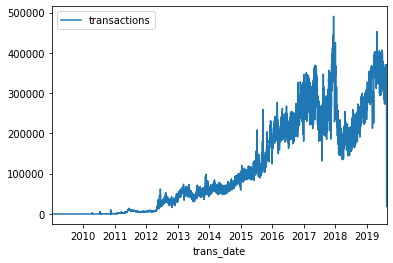

In [9]:
transactions_by_date.set_index('trans_date').plot()